# Battleship Reinforcement Learning Project

This notebook demonstrates the implementation of various agents for playing the Battleship game:
1. Random Agent (baseline)
2. Smart Agent (with explore-exploit strategy)
3. Q-Learning Agent (reinforcement learning)

We'll train each agent, evaluate its performance, and compare results across agents.

## Setup and Installation

In [1]:
# Install required packages
!pip install gym matplotlib numpy pandas


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Check if running in Google Colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("Running in Google Colab")
    # Create Python files if running in Colab
    # You can paste the file contents here
else:
    print("Running locally")

Running locally


## Import Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from datetime import datetime

# Import our custom modules
from battleship_env import BattleshipEnv, create_test_scenario, setup_results_directory
from random_agent import RandomAgent, train_random_agent, evaluate_random_agent
from smart_agent import SmartAgent, train_smart_agent, evaluate_smart_agent
from qlearning_agent import QLearningAgent, train_qlearning_agent, evaluate_qlearning_agent
from model_comparison import compare_agents, load_agent_from_file

## Test Environment Creation

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


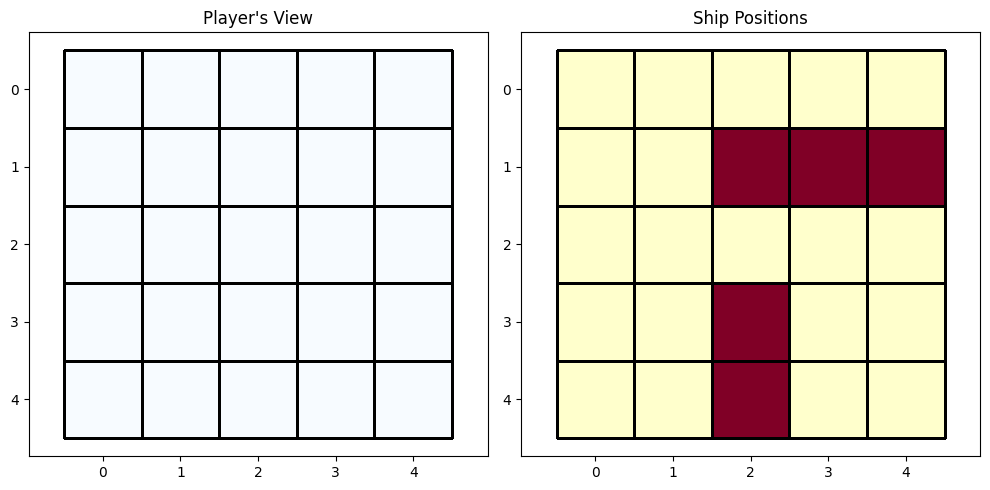

Ship positions:
[[0 0 0 0 0]
 [0 0 3 3 3]
 [0 0 0 0 0]
 [0 0 2 0 0]
 [0 0 2 0 0]]


In [4]:
# Create a test environment
env = BattleshipEnv(grid_size=5, ships_config=[3, 2])
observation = env.reset()

# Render the initial state
env.render()

# Print the ship grid (this would be hidden from the player in a real game)
print("Ship positions:")
print(env.ship_grid)

## Test Fixed Scenario

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


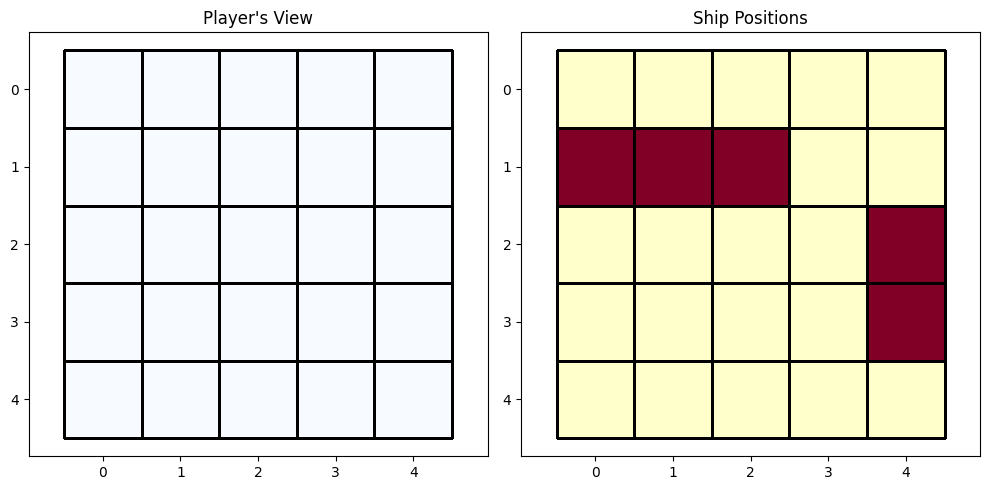

Fixed test scenario ship positions:
[[0 0 0 0 0]
 [3 3 3 0 0]
 [0 0 0 0 2]
 [0 0 0 0 2]
 [0 0 0 0 0]]


In [5]:
# Create a test scenario with fixed ship positions
test_env = create_test_scenario(grid_size=5, ships_config=[3, 2])

# Render the initial state
test_env.render()

# Print the ship grid
print("Fixed test scenario ship positions:")
print(test_env.ship_grid)

## Random Agent

In [6]:
# Train the random agent
print("Training Random Agent...")
random_agent, random_results = train_random_agent(episodes=100)

# Evaluate on fixed test scenario
print("\nEvaluating Random Agent on fixed test scenario...")
random_fixed_results = evaluate_random_agent(random_agent, test_episodes=50, fixed_test=True)

# Evaluate on random scenarios
print("\nEvaluating Random Agent on random scenarios...")
random_random_results = evaluate_random_agent(random_agent, test_episodes=50, fixed_test=False)

Training Random Agent...
Episode 10/100 completed.
Recent average shots: 23.10
Episode 20/100 completed.
Recent average shots: 22.90
Episode 30/100 completed.
Recent average shots: 21.20
Episode 40/100 completed.
Recent average shots: 22.10
Episode 50/100 completed.
Recent average shots: 21.20
Episode 60/100 completed.
Recent average shots: 21.00
Episode 70/100 completed.
Recent average shots: 23.00
Episode 80/100 completed.
Recent average shots: 21.20
Episode 90/100 completed.
Recent average shots: 20.50
Episode 100/100 completed.
Recent average shots: 23.00

Training completed for Random Agent
Average shots to win: 21.92
Win rate: 1.00
Results saved to: battleship_results\training\RandomAgent_20250327_003029

Evaluating Random Agent on fixed test scenario...

Evaluation completed for Random Agent
Average shots to win: 20.82
Win rate: 1.00
Results saved to: battleship_results\testing\RandomAgent_20250327_003029

Evaluating Random Agent on random scenarios...

Evaluation completed for 

## Smart Agent

In [7]:
# Train the smart agent
print("Training Smart Agent...")
smart_agent, smart_results = train_smart_agent(episodes=100)

# Evaluate on fixed test scenario
print("\nEvaluating Smart Agent on fixed test scenario...")
smart_fixed_results = evaluate_smart_agent(smart_agent, test_episodes=50, fixed_test=True)

# Evaluate on random scenarios
print("\nEvaluating Smart Agent on random scenarios...")
smart_random_results = evaluate_smart_agent(smart_agent, test_episodes=50, fixed_test=False)

Training Smart Agent...
Episode 10/100 completed.
Recent average shots: 14.90
Episode 20/100 completed.
Recent average shots: 17.40
Episode 30/100 completed.
Recent average shots: 13.10
Episode 40/100 completed.
Recent average shots: 14.40
Episode 50/100 completed.
Recent average shots: 17.70
Episode 60/100 completed.
Recent average shots: 17.30
Episode 70/100 completed.
Recent average shots: 15.40
Episode 80/100 completed.
Recent average shots: 12.40
Episode 90/100 completed.
Recent average shots: 16.10
Episode 100/100 completed.
Recent average shots: 16.40

Training completed for Smart Agent
Average shots to win: 15.51
Win rate: 1.00
Results saved to: battleship_results\training\SmartAgent_20250327_003035

Evaluating Smart Agent on fixed test scenario...

Evaluation completed for Smart Agent
Average shots to win: 16.68
Win rate: 1.00
Results saved to: battleship_results\testing\SmartAgent_20250327_003035

Evaluating Smart Agent on random scenarios...

Evaluation completed for Smart A

## Q-Learning Agent

Note: Training the Q-Learning agent may take longer than the other agents.

In [9]:
# Train the Q-Learning agent with fewer episodes for this demonstration
# In a real scenario, you might want to use more episodes (e.g., 1000)
print("Training Q-Learning Agent...")
qlearning_agent, qlearning_results = train_qlearning_agent(episodes=10000)

# Evaluate on fixed test scenario
print("\nEvaluating Q-Learning Agent on fixed test scenario...")
ql_fixed_results = evaluate_qlearning_agent(qlearning_agent, test_episodes=50, fixed_test=True)

# Evaluate on random scenarios
print("\nEvaluating Q-Learning Agent on random scenarios...")
ql_random_results = evaluate_qlearning_agent(qlearning_agent, test_episodes=50, fixed_test=False)

Training Q-Learning Agent...
Episode 100/10000 completed.
Recent average shots: 21.50
Recent average reward: 12.00
Exploration rate: 0.0100
Episode 200/10000 completed.
Recent average shots: 21.88
Recent average reward: 12.00
Exploration rate: 0.0100
Episode 300/10000 completed.
Recent average shots: 21.94
Recent average reward: 12.00
Exploration rate: 0.0100
Episode 400/10000 completed.
Recent average shots: 21.32
Recent average reward: 12.00
Exploration rate: 0.0100
Episode 500/10000 completed.
Recent average shots: 21.74
Recent average reward: 12.00
Exploration rate: 0.0100
Episode 600/10000 completed.
Recent average shots: 21.39
Recent average reward: 12.00
Exploration rate: 0.0100
Episode 700/10000 completed.
Recent average shots: 21.64
Recent average reward: 12.00
Exploration rate: 0.0100
Episode 800/10000 completed.
Recent average shots: 21.93
Recent average reward: 12.00
Exploration rate: 0.0100
Episode 900/10000 completed.
Recent average shots: 21.95
Recent average reward: 12.

## Agent Comparison

In [10]:
# Compare all agents
agents = [random_agent, smart_agent, qlearning_agent]
comparison_results = compare_agents(agents, test_episodes=50, fixed_test=True)

# You can also load pre-trained agents from files
'''
random_agent = load_agent_from_file('path/to/random_agent.pkl')
smart_agent = load_agent_from_file('path/to/smart_agent.pkl')
qlearning_agent = load_agent_from_file('path/to/qlearning_agent.pkl')

agents = [random_agent, smart_agent, qlearning_agent]
comparison_results = compare_agents(agents, test_episodes=50, fixed_test=True)
'''

Comparison episode 10/50 completed.
Comparison episode 20/50 completed.
Comparison episode 30/50 completed.
Comparison episode 40/50 completed.
Comparison episode 50/50 completed.

Comparison completed for RandomAgent, SmartAgent, QLearningAgent
Results saved to: battleship_results\testing\comparison_20250327_003105

Performance Statistics:
         Agent  Win Rate  Avg Shots  Min Shots  Max Shots  Std Dev
   RandomAgent       1.0      21.76         11         25 3.367848
    SmartAgent       1.0      18.38          9         25 4.971479
QLearningAgent       1.0      22.18         11         25 2.977852


"\nrandom_agent = load_agent_from_file('path/to/random_agent.pkl')\nsmart_agent = load_agent_from_file('path/to/smart_agent.pkl')\nqlearning_agent = load_agent_from_file('path/to/qlearning_agent.pkl')\n\nagents = [random_agent, smart_agent, qlearning_agent]\ncomparison_results = compare_agents(agents, test_episodes=50, fixed_test=True)\n"

## Manual Test of Random Agent

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Starting Random Agent test game...
Shot 1: Firing at position (1, 0)
Result: Miss
Shot 2: Firing at position (3, 1)
Result: Miss
Shot 3: Firing at position (0, 3)
Result: Miss
Shot 4: Firing at position (3, 0)
Result: Miss
Shot 5: Firing at position (2, 4)
Result: Miss
Shot 6: Firing at position (4, 2)
Result: Miss
Shot 7: Firing at position (3, 2)
Result: Hit
Shot 8: Firing at position (2, 3)
Result: Hit
Shot 9: Firing at position (2, 1)
Result: Miss
Shot 10: Firing at position (2, 0)
Result: Miss
Shot 11: Firing at position (3, 4)
Result: Miss
Shot 12: Firing at position (4, 4)
Result: Miss
Shot 13: Firing at position (0, 4)
Result: Miss
Shot 14: Firing at position (3, 3)
Result: Hit
Shot 15: Firing at position (4, 0)
Result: Miss
Shot 16: Firing at position (4, 3)
Result: Miss
Shot 17: Firing at position (0, 2)
Result: Miss
Shot 18: Firing at position (0, 1)
Result: Miss
Shot 19: Firing at position (1, 3)
Result: Hit
Shot 20: Firing at position (1, 1)
Result: Miss
Shot 21: Firing at

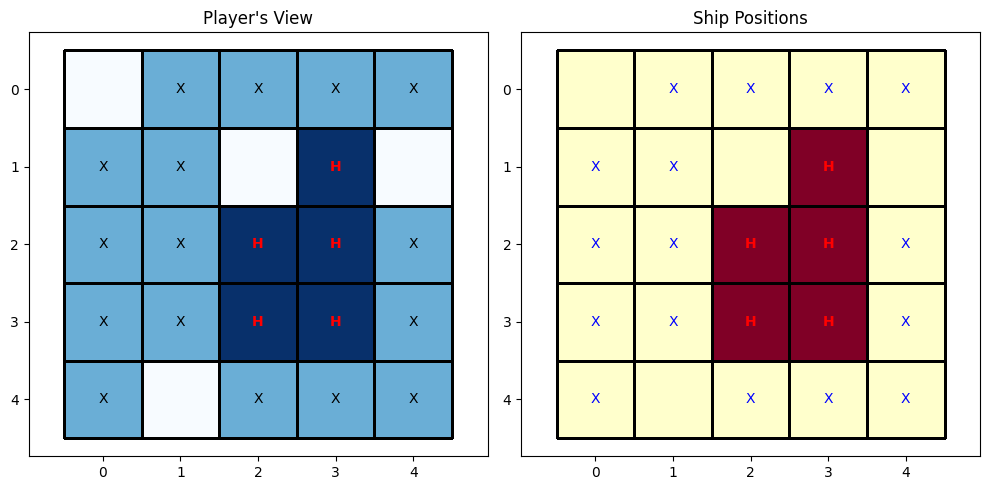

In [11]:
def run_random_test(render_steps=False):
    """Run a test scenario with the random agent."""
    grid_size = 5
    ships_config = [3, 2]
    
    # Create test environment
    env = create_test_scenario(grid_size=grid_size, ships_config=ships_config)
    
    # Create agent
    agent = RandomAgent(grid_size=grid_size)
    
    # Run a single episode
    observation = env.reset()
    agent.reset()
    done = False
    shots = 0
    
    print("Starting Random Agent test game...")
    
    while not done:
        action = agent.act(observation)
        row, col = divmod(action, grid_size)
        print(f"Shot {shots + 1}: Firing at position ({row}, {col})")
        
        observation, reward, done, info = env.step(action)
        shots += 1
        
        print(f"Result: {info['message']}")
        
        if render_steps:
            env.render()
        
        if done:
            print(f"Game over! Ships sunk: {env.ships_sunk}")
            print(f"Total shots: {shots}")
            break
    
    # Render final state
    env.render()
    
    return env, agent, shots

# Run a test game
env, agent, shots = run_random_test(render_steps=False)

## Manual Test of Smart Agent

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Starting Smart Agent test game...
Shot 1: Firing at position (0, 0)
Result: Miss
Agent Mode: explore
Shot 2: Firing at position (2, 2)
Result: Miss
Agent Mode: explore
Shot 3: Firing at position (0, 2)
Result: Miss
Agent Mode: explore
Shot 4: Firing at position (2, 3)
Result: Miss
Agent Mode: explore
Shot 5: Firing at position (2, 1)
Result: Miss
Agent Mode: explore
Shot 6: Firing at position (2, 4)
Result: Miss
Agent Mode: explore
Shot 7: Firing at position (2, 0)
Result: Miss
Agent Mode: explore
Shot 8: Firing at position (1, 0)
Result: Miss
Agent Mode: explore
Shot 9: Firing at position (1, 2)
Result: Hit
Agent Mode: exploit
Shot 10: Firing at position (1, 1)
Result: Miss
Agent Mode: exploit
Shot 11: Firing at position (1, 3)
Result: Hit
Agent Mode: explore
Shot 12: Firing at position (3, 3)
Result: Miss
Agent Mode: explore
Shot 13: Firing at position (4, 4)
Result: Miss
Agent Mode: explore
Shot 14: Firing at position (4, 1)
Result: Hit
Agent Mode: exploit
Shot 15: Firing at positio

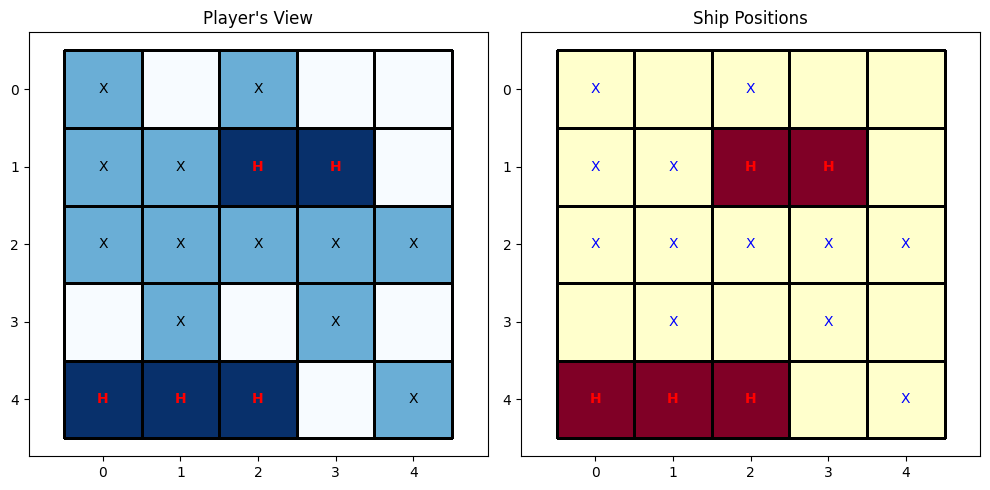

In [12]:
def run_smart_test(render_steps=False):
    """Run a test scenario with the smart agent."""
    grid_size = 5
    ships_config = [3, 2]
    
    # Create test environment
    env = create_test_scenario(grid_size=grid_size, ships_config=ships_config)
    
    # Create agent
    agent = SmartAgent(grid_size=grid_size)
    
    # Run a single episode
    observation = env.reset()
    agent.reset()
    done = False
    shots = 0
    
    print("Starting Smart Agent test game...")
    
    while not done:
        action = agent.act(observation)
        row, col = divmod(action, grid_size)
        print(f"Shot {shots + 1}: Firing at position ({row}, {col})")
        
        next_observation, reward, done, info = env.step(action)
        agent.update(observation, action, reward, next_observation, done, info)
        observation = next_observation
        shots += 1
        
        print(f"Result: {info['message']}")
        print(f"Agent Mode: {agent.mode}")
        
        if render_steps:
            env.render()
        
        if done:
            print(f"Game over! Ships sunk: {env.ships_sunk}")
            print(f"Total shots: {shots}")
            break
    
    # Render final state
    env.render()
    
    return env, agent, shots

# Run a test game
env, agent, shots = run_smart_test(render_steps=False)

## Custom Test Scenario

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


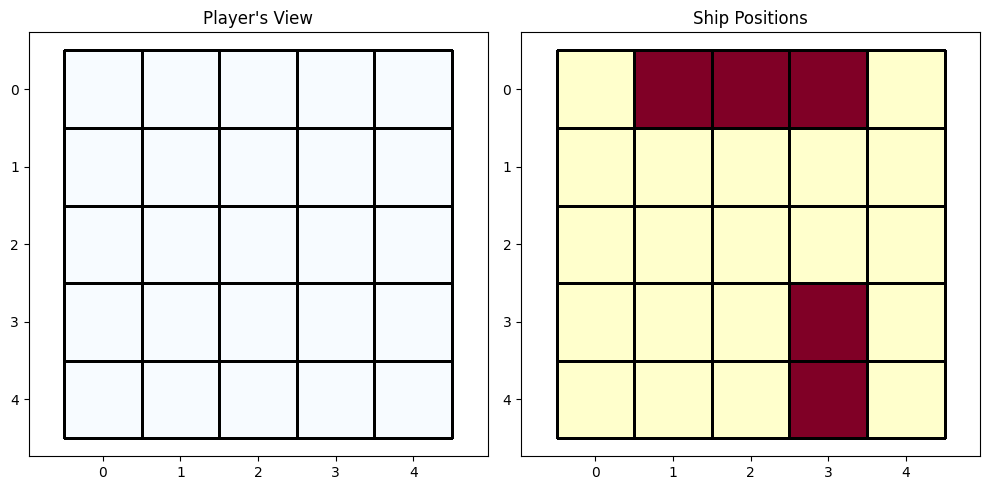

In [13]:
def create_custom_test_scenario(grid_size=5, ships_config=None):
    """Create a custom test scenario with user-defined ship positions."""
    if ships_config is None:
        ships_config = [3, 2]  # Default ship configuration for 5x5 grid
        
    # Create standard environment
    env = BattleshipEnv(grid_size=grid_size, ships_config=ships_config)
    
    # Override random ship placement with custom positions
    env.ship_grid = np.zeros((grid_size, grid_size), dtype=np.int32)
    
    # Place ship of size 3 horizontally at (0,1), (0,2), (0,3)
    env.ship_grid[0, 1] = 3
    env.ship_grid[0, 2] = 3
    env.ship_grid[0, 3] = 3
    
    # Place ship of size 2 vertically at (3,3), (4,3)
    env.ship_grid[3, 3] = 2
    env.ship_grid[4, 3] = 2
    
    # Reset other environment variables to be consistent with the ship placement
    env.total_ship_cells = sum(ships_config)
    env.hits = 0
    env.ships_sunk = 0
    env.shots_fired = 0
    env.game_over = False
    env.action_history = []
    
    return env

# Create and visualize a custom test scenario
custom_env = create_custom_test_scenario()
custom_env.render()

## Different Grid Size Test

In [ ]:
# Test with a larger grid size
grid_size = 8
ships_config = [4, 3, 3, 2]  # More ships for a larger grid

# Create environment
large_env = BattleshipEnv(grid_size=grid_size, ships_config=ships_config)
observation = large_env.reset()

# Render the initial state
large_env.render()

# Print the ship grid
print("Ship positions for larger grid:")
print(large_env.ship_grid)

## Save Pre-trained Agents for Future Use

In [5]:
# Create a directory for saving agents
os.makedirs("saved_agents", exist_ok=True)

# Save agents
random_agent.save("saved_agents/random_agent.pkl")
smart_agent.save("saved_agents/smart_agent.pkl")
qlearning_agent.save("saved_agents/qlearning_agent.pkl")

print("Agents saved to 'saved_agents' directory.")

NameError: name 'random_agent' is not defined

## Example of Loading Pre-trained Agents

In [6]:
# Load pre-trained agents
loaded_random_agent = load_agent_from_file("saved_agents/random_agent.pkl")
loaded_smart_agent = load_agent_from_file("saved_agents/smart_agent.pkl")
loaded_qlearning_agent = load_agent_from_file("saved_agents/qlearning_agent.pkl")

print(f"Loaded Random Agent: {loaded_random_agent.name}")
print(f"Loaded Smart Agent: {loaded_smart_agent.name}")
print(f"Loaded Q-Learning Agent: {loaded_qlearning_agent.name}")

Loaded Random Agent: RandomAgent
Loaded Smart Agent: SmartAgent
Loaded Q-Learning Agent: QLearningAgent


## Comparison between models

In [7]:
from FinalProject.tournament_comparison import TournamentComparison

# Set up the tournament
agents = [loaded_random_agent, loaded_smart_agent, loaded_qlearning_agent]
custom_names = ["Random Agent", "Smart Agent", "QLearning Agent"]
tournament = TournamentComparison(agents)

# Run the tournament
results = tournament.run_tournament(episodes=100)

# View the results
print(f"Agent with most wins: {max(results['wins'], key=results['wins'].get)}")

Tournament episode 10/100 completed.
Tournament episode 20/100 completed.
Tournament episode 30/100 completed.
Tournament episode 40/100 completed.
Tournament episode 50/100 completed.
Tournament episode 60/100 completed.
Tournament episode 70/100 completed.
Tournament episode 80/100 completed.
Tournament episode 90/100 completed.
Tournament episode 100/100 completed.
Agent with most wins: SmartAgent


## **Visualize Game**
### **Smart Agent vs Q-Learning Agent**

In [8]:
from random_agent import RandomAgent
from smart_agent import SmartAgent
from visual_game_player import VisualGamePlayer

loaded_smart_agent = load_agent_from_file("saved_agents/smart_agent.pkl")
loaded_qlearning_agent = load_agent_from_file("saved_agents/qlearning_agent.pkl")


# Create visual game player with custom names
player = VisualGamePlayer(
    loaded_smart_agent, loaded_qlearning_agent,
    agent1_name="Captain Smart",
    agent2_name="Admiral Q",
    use_gui=True  # Set to False for command line interface
)

# Start the game
player.play_game(True)

## **Enhanced QLearning Agent**

In [9]:
from FinalProject.enhanced_qlearning_agent import train_enhanced_qlearning_agent, evaluate_enhanced_qlearning_agent, \
    progressive_training

# Standard training (20,000 episodes)
enhanced_qlearning_agent, results = train_enhanced_qlearning_agent(episodes=20000)

Episode 100/20000 | Exploration rate: 0.6239 | Recent avg shots: 47.18 | Recent avg reward: 15.11 | Time elapsed: 0.5s | Est. time remaining: 98.7s
Episode 200/20000 | Exploration rate: 0.4732 | Recent avg shots: 27.63 | Recent avg reward: 16.86 | Time elapsed: 0.8s | Est. time remaining: 80.9s
Episode 300/20000 | Exploration rate: 0.3738 | Recent avg shots: 23.59 | Recent avg reward: 16.87 | Time elapsed: 1.1s | Est. time remaining: 71.5s
Episode 400/20000 | Exploration rate: 0.2973 | Recent avg shots: 22.91 | Recent avg reward: 16.88 | Time elapsed: 1.4s | Est. time remaining: 66.4s
Episode 500/20000 | Exploration rate: 0.2381 | Recent avg shots: 22.18 | Recent avg reward: 17.01 | Time elapsed: 1.6s | Est. time remaining: 62.9s
Episode 600/20000 | Exploration rate: 0.1936 | Recent avg shots: 20.72 | Recent avg reward: 17.28 | Time elapsed: 1.9s | Est. time remaining: 60.0s
Episode 700/20000 | Exploration rate: 0.1569 | Recent avg shots: 20.97 | Recent avg reward: 17.10 | Time elapsed

NameError: name 'agent' is not defined

In [10]:
# Evaluate the trained agent
test_results = evaluate_enhanced_qlearning_agent(enhanced_qlearning_agent, test_episodes=100)

# OR use progressive training (recommended for best results)
enhanced_qlearning_agent_progressively_trained, enhanced_qlearning_agent_results = progressive_training()
print(enhanced_qlearning_agent_results)

Evaluated 10/100 episodes | Avg shots: 20.10
Evaluated 20/100 episodes | Avg shots: 19.40
Evaluated 30/100 episodes | Avg shots: 17.60
Evaluated 40/100 episodes | Avg shots: 18.20
Evaluated 50/100 episodes | Avg shots: 20.70
Evaluated 60/100 episodes | Avg shots: 18.80
Evaluated 70/100 episodes | Avg shots: 20.40
Evaluated 80/100 episodes | Avg shots: 18.30
Evaluated 90/100 episodes | Avg shots: 16.90
Evaluated 100/100 episodes | Avg shots: 21.10
Evaluation completed in 0.2s

Evaluation completed for Enhanced Q-Learning Agent
Average shots to win: 19.15
Average reward: 17.45
Win rate: 0.95
Results saved to: battleship_results\testing\EnhancedQLearningAgent_20250327_004102

=== Stage 1: Training on 3x3 grid with a single ship ===
Episode 100/5000 | Exploration rate: 0.8547 | Recent avg shots: 7.85 | Recent avg reward: 6.42 | Time elapsed: 0.1s | Est. time remaining: 3.1s
Episode 200/5000 | Exploration rate: 0.7432 | Recent avg shots: 6.99 | Recent avg reward: 6.50 | Time elapsed: 0.1s |

In [12]:
enhanced_qlearning_agent_progressively_trained.save("saved_agents/enhanced_qlearning_agent_progressively_trained.pkl")
enhanced_qlearning_agent.save("saved_agents/enhanced_qlearning_agent.pkl")


## **Tournament**

In [14]:
loaded_enhanced_qlearning_agent = load_agent_from_file("saved_agents/enhanced_qlearning_agent.pkl")
loaded_enhanced_qlearning_agent_progressively_trained = load_agent_from_file("saved_agents/enhanced_qlearning_agent_progressively_trained.pkl")

# Create visual game player with custom names
player = VisualGamePlayer(
    loaded_enhanced_qlearning_agent, loaded_enhanced_qlearning_agent_progressively_trained,
    agent1_name="Enhanced Q",
    agent2_name="Enhanced Q Progressive",
    use_gui=True  # Set to False for command line interface
)

# Start the game
player.play_game(True)

## Conclusion

This notebook demonstrates the implementation of three different agents for playing the Battleship game:
1. Random Agent: Makes random guesses (baseline)
2. Smart Agent: Uses a simple explore-exploit strategy
3. Q-Learning Agent: Uses reinforcement learning to improve over time

Key findings:
- The Random Agent provides a baseline performance
- The Smart Agent significantly improves over random guessing by using a targeted approach after finding hits
- The Q-Learning Agent learns optimal strategies through experience, potentially outperforming both other agents with sufficient training

The model comparison framework allows for fair evaluation of different strategies on the same test scenarios.